In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import spacy
import string
from collections import Counter
from wordcloud import WordCloud

In [17]:
datos= pd.read_csv('encuesta_formulario.csv')

In [18]:
datos.shape

(36, 14)

In [19]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              36 non-null     int64  
 1   Hora de inicio                  36 non-null     object 
 2   Hora de finalización            36 non-null     object 
 3   Correo electrónico              36 non-null     object 
 4   Nombre                          0 non-null      float64
 5   Language                        36 non-null     object 
 6   Hora de la última modificación  0 non-null      float64
 7   Consentimiento                  36 non-null     object 
 8   Correo                          35 non-null     object 
 9   Tipo usuario                    35 non-null     object 
 10  Carrera                         35 non-null     object 
 11  Semestre                        34 non-null     object 
 12  Edad                            35 non

In [20]:
datos = datos.loc[datos.Consentimiento == "Sí"]
datos.shape

(35, 14)

In [21]:
df = datos.drop(['ID','Hora de inicio','Hora de finalización','Correo electrónico','Nombre','Language','Hora de la última modificación','Consentimiento','Correo'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 35
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo usuario  35 non-null     object 
 1   Carrera       35 non-null     object 
 2   Semestre      34 non-null     object 
 3   Edad          35 non-null     float64
 4   Comentario    35 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.6+ KB


In [22]:
df.isnull().sum()

Tipo usuario    0
Carrera         0
Semestre        1
Edad            0
Comentario      0
dtype: int64

In [23]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Tipo usuario,35,1,Estudiante,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carrera,35,11,Ingeniería de Datos e Inteligencia Artificial,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Semestre,34,6,Segundo,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edad,35.0,NaN,NaN,NaN,18.085714,1.221653,15.0,17.0,18.0,19.0,22.0
Comentario,35,35,El crai me parece un lugar bastante útil y gra...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.head()

,Tipo usuario,Carrera,Semestre,Edad,Comentario
0,Estudiante,Ingeniería Biomédica,Tercero,19.0,El crai me parece un lugar bastante útil y gra...
1,Estudiante,Ingeniería Industrial,Tercero,18.0,"La calidad de sus recursos, la eficiencia de s..."
2,Estudiante,Ingeniería Biomédica,Noveno,22.0,Me parece un buen servicio
3,Estudiante,Ingeniería Industrial,Quinto,19.0,Creo que el CRAI es un buen espacio de estudio...
4,Estudiante,Ingeniería Informática,Cuarto,20.0,"Buen servicio, me gusta la dispocicion de comp..."


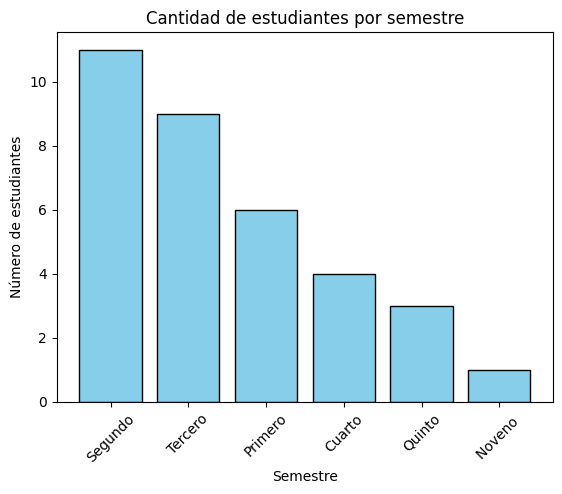

In [25]:
conteo_semestre = df['Semestre'].value_counts()
fig, ax = plt.subplots()
ax.bar(conteo_semestre.index,conteo_semestre.values, color = "skyblue", edgecolor = "black")
ax.set_xlabel('Semestre')
ax.set_ylabel('Número de estudiantes')
ax.set_title('Cantidad de estudiantes por semestre')
plt.xticks(rotation=45)
plt.show()


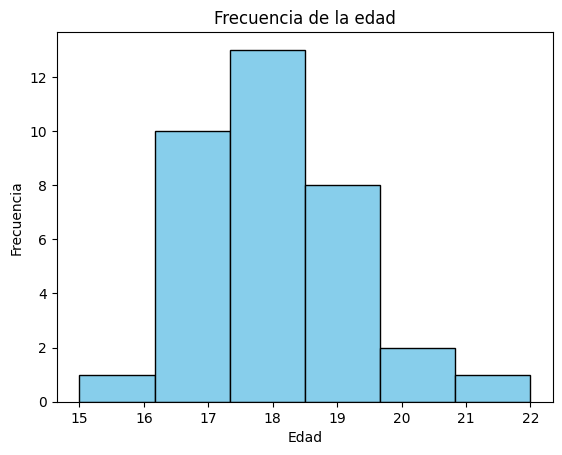

In [26]:
edad = df.Edad.values
fig, ax = plt.subplots()
puntos = math.floor(1+3.322*math.log10(len(edad)))

ax.hist(edad,color = "skyblue", edgecolor = "black", bins= puntos)
plt.title("Frecuencia de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

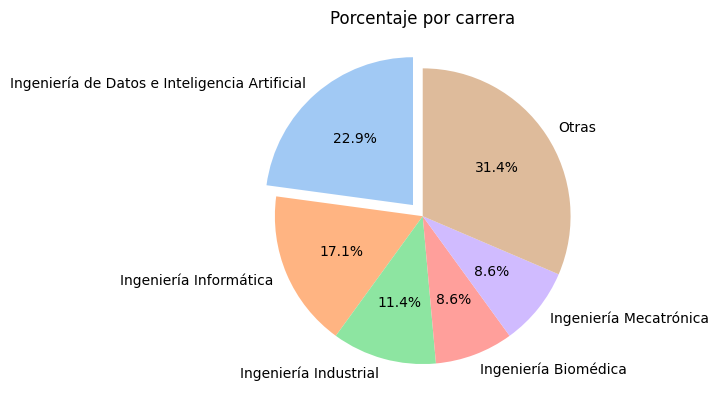

In [27]:
porcentajecarrera = df["Carrera"].value_counts(normalize=True)
top_carreras = porcentajecarrera.head(5)
otros_porcentaje = porcentajecarrera[5:].sum()

etiquetas = top_carreras.index.tolist()
etiquetas.append("Otras")
porcentajes = top_carreras.tolist()
porcentajes.append(otros_porcentaje)

colores = sns.color_palette("pastel")
explode = (0.1, 0, 0, 0, 0, 0)
fig, ax = plt.subplots()
ax.pie(porcentajes, labels=etiquetas, autopct="%1.1f%%", colors=colores, startangle=90, explode=explode)
ax.set_title("Porcentaje por carrera")

plt.show()

# **visualización de los comentarios haciendo uso del PLN**


In [29]:
nlp = spacy.load("es_core_news_sm")

In [30]:
stopwords = spacy.lang.es.stop_words.STOP_WORDS

In [31]:
def limpiar_texto(texto):
    texto_limpio = ""
    for token in texto:
        if token.text.lower() not in stopwords and token.text not in string.punctuation:
            texto_limpio += token.text.lower() + " "
    return texto_limpio.strip()

In [32]:
texto_completo = " ".join(df["Comentario "])
doc = nlp(texto_completo)
texto_limpio = limpiar_texto(doc)
doc_limpio = nlp(texto_limpio)

In [33]:
frases_clave = [token.text for token in doc_limpio if token.pos_ in ("NOUN", "ADJ")]
frases_clave_frecuencia = Counter(frases_clave)

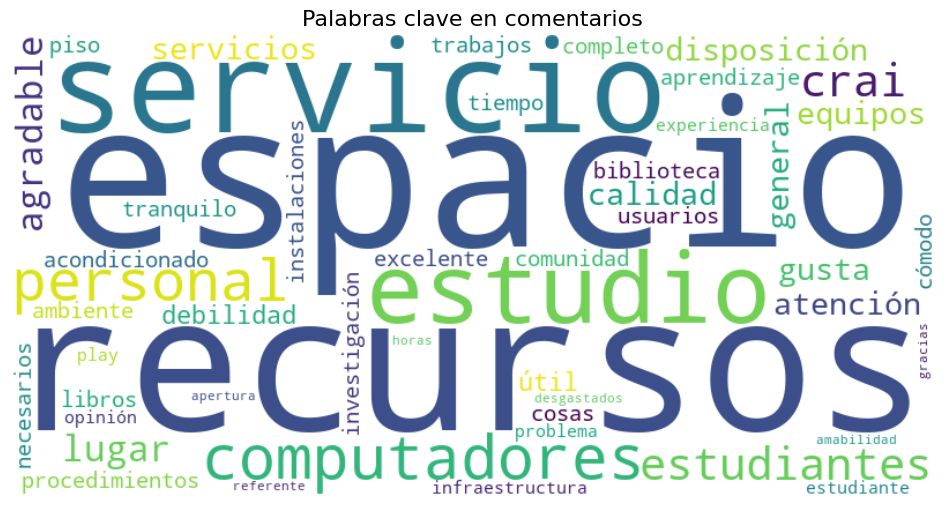

In [38]:
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis",
                      max_words=50, relative_scaling=0.5).generate_from_frequencies(frases_clave_frecuencia)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Palabras clave en comentarios", fontsize=16)
plt.axis("off")
plt.show()